In [75]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [76]:
df_intrusion = pd.read_csv('Train_data.csv')

In [77]:
df_intrusion.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [78]:
df_intrusion.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'xAttack'],
      dtype='object')

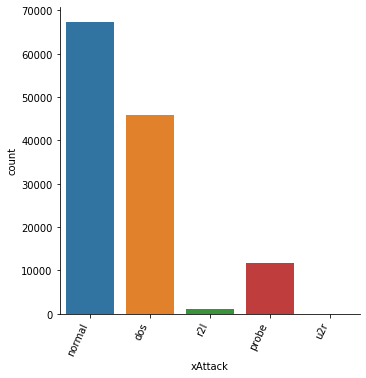

In [79]:
chart = sns.catplot(
    data=df_intrusion,
    kind='count',
    x='xAttack'
)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

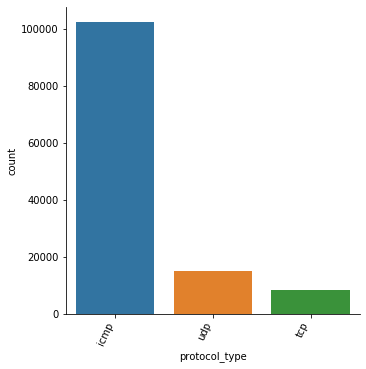

In [80]:
chart = sns.catplot(
    data=df_intrusion,
    kind='count',
    x='protocol_type'
)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

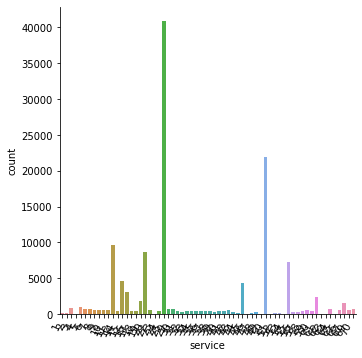

In [81]:
chart = sns.catplot(
    data=df_intrusion,
    kind='count',
    x='service'
)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

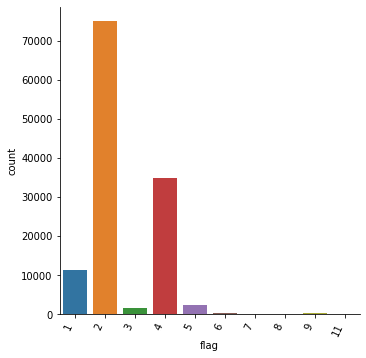

In [82]:
chart = sns.catplot(
    data=df_intrusion,
    kind='count',
    x='flag'
)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

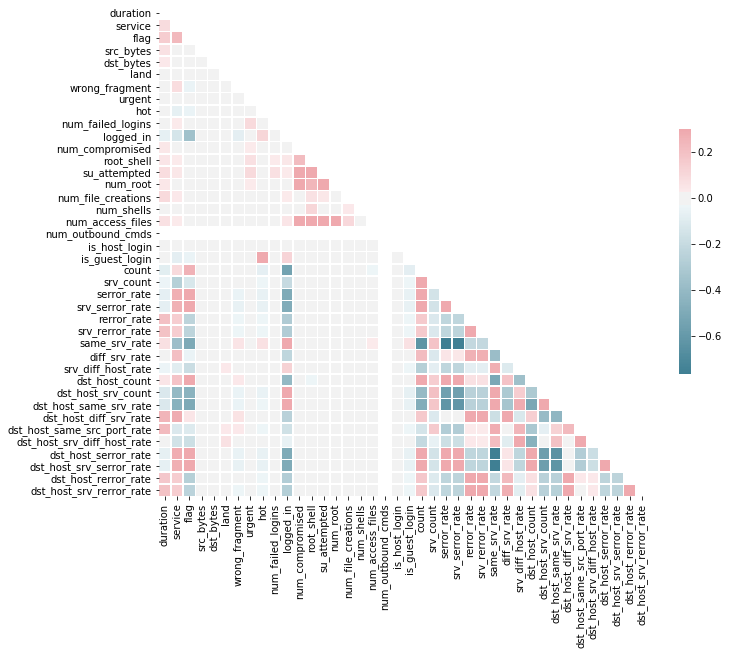

In [83]:
# Show the correlation between the various factors

import numpy as np

# Compute the correlation matrix
corr = df_intrusion.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [84]:
df_intrusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  int64  
 3   flag                         125973 non-null  int64  
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [85]:
df_intrusion.protocol_type= [1 if each == "icmp"
                               else 2 if each == "udp" 
                               else 0 
                               for each in df_intrusion.protocol_type]

df_intrusion.xAttack= [1 if each == "dos"
                               else 2 if each == "probe" 
                               else 3 if each == "u2r"
                               else 4 if each == "r2l"
                               else 0 
                               for each in df_intrusion.xAttack]


In [86]:
df_intrusion_t = pd.read_csv('test_data.csv')

In [87]:
df_intrusion_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   10000 non-null  int64  
 1   duration                     10000 non-null  int64  
 2   protocol_type                10000 non-null  object 
 3   service                      10000 non-null  int64  
 4   flag                         10000 non-null  int64  
 5   src_bytes                    10000 non-null  int64  
 6   dst_bytes                    10000 non-null  int64  
 7   land                         10000 non-null  int64  
 8   wrong_fragment               10000 non-null  int64  
 9   urgent                       10000 non-null  int64  
 10  hot                          10000 non-null  int64  
 11  num_failed_logins            10000 non-null  int64  
 12  logged_in                    10000 non-null  int64  
 13  num_compromised  

In [88]:
df_intrusion_t=df_intrusion_t.drop(["Unnamed: 0"], axis=1)

In [89]:
df_intrusion_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     10000 non-null  int64  
 1   protocol_type                10000 non-null  object 
 2   service                      10000 non-null  int64  
 3   flag                         10000 non-null  int64  
 4   src_bytes                    10000 non-null  int64  
 5   dst_bytes                    10000 non-null  int64  
 6   land                         10000 non-null  int64  
 7   wrong_fragment               10000 non-null  int64  
 8   urgent                       10000 non-null  int64  
 9   hot                          10000 non-null  int64  
 10  num_failed_logins            10000 non-null  int64  
 11  logged_in                    10000 non-null  int64  
 12  num_compromised              10000 non-null  int64  
 13  root_shell       

In [90]:
df_intrusion_t['service'].unique()

array([25, 20, 29, 48, 50, 61, 45, 12, 55, 24, 19, 15, 32, 16, 58,  3, 52,
       69, 37, 34, 67, 10,  6, 64, 36,  7, 44,  5, 30, 14, 46,  8, 38, 22,
       39, 11, 17, 70, 56, 47, 41, 33, 59, 18, 42, 57, 54,  9, 53,  1, 40,
       31, 60, 43, 35, 63, 49, 66,  2], dtype=int64)

In [91]:
df_intrusion_t['xAttack'].unique()

array(['dos', 'normal', 'probe', 'r2l', 'u2r'], dtype=object)

In [92]:
df_intrusion_t.protocol_type= [1 if each == "icmp"
                               else 2 if each == "udp" 
                               else 0 
                               for each in df_intrusion_t.protocol_type]
df_intrusion_t.xAttack= [1 if each == "dos"
                               else 2 if each == "probe" 
                               else 3 if each == "u2r"
                               else 4 if each == "r2l"
                               else 0 
                               for each in df_intrusion_t.xAttack]


In [93]:
# Create two pandas arrays -- one for X and one for Y to get ready 
# for neural network

# convert the array into a numpy array
arr_train = df_intrusion.to_numpy()
arr_test = df_intrusion_t.to_numpy()

# separate X and Y
X_train = arr_train[:,0:41]
Y_train = arr_train[:,41]


# separate X and Y
X_test = arr_test[:,0:41]
Y_test = arr_test[:,41]

In [94]:
X_train

array([[0.0e+00, 1.0e+00, 2.0e+01, ..., 0.0e+00, 5.0e-02, 0.0e+00],
       [0.0e+00, 2.0e+00, 4.5e+01, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [0.0e+00, 1.0e+00, 5.0e+01, ..., 1.0e+00, 0.0e+00, 0.0e+00],
       ...,
       [0.0e+00, 1.0e+00, 5.5e+01, ..., 0.0e+00, 1.0e-02, 0.0e+00],
       [0.0e+00, 1.0e+00, 3.1e+01, ..., 1.0e+00, 0.0e+00, 0.0e+00],
       [0.0e+00, 1.0e+00, 2.0e+01, ..., 0.0e+00, 0.0e+00, 0.0e+00]])

In [95]:
Y_train

array([0., 0., 1., ..., 0., 1., 0.])

In [96]:
X_test

array([[  0.  ,   1.  ,  25.  , ...,   0.65,   0.32,   0.32],
       [  0.  ,   1.  ,  25.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   1.  ,  25.  , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  0.  ,   2.  ,  50.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   1.  ,  25.  , ...,   0.  ,   0.  ,   0.  ],
       [282.  ,   1.  ,  20.  , ...,   0.  ,   0.82,   0.  ]])

In [97]:
Y_test

array([1., 0., 0., ..., 0., 0., 4.])

In [98]:
# Prepare Y values for one-hot encoding

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# # encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(X_train[:])
# encoded_X_train= encoder.transform(X_train)
# # convert integers to dummy variables (i.e. one hot encoded)
# dummy_X_train = np_utils.to_categorical(encoded_X_train)


# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y_train)
encoded_Y_train= encoder.transform(Y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = np_utils.to_categorical(encoded_Y_train)


# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y_test)
encoded_Y_test= encoder.transform(Y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_Test = np_utils.to_categorical(encoded_Y_test)



In [99]:
dummy_y_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [100]:
Y_test

array([1., 0., 0., ..., 0., 0., 4.])

In [101]:
Y_train

array([0., 0., 1., ..., 0., 1., 0.])

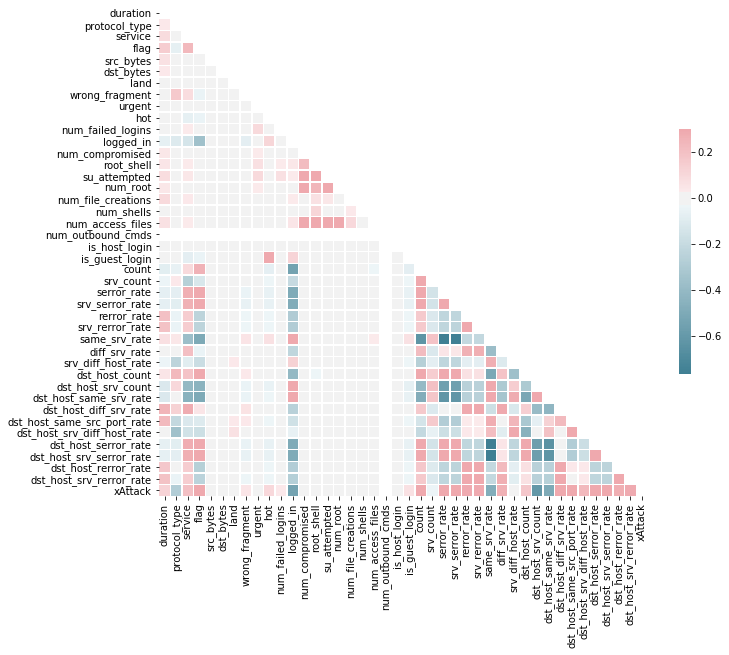

In [102]:
# Show the correlation between the various factors

import numpy as np

# Compute the correlation matrix
corr = df_intrusion.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [103]:
X_train.shape

(125973, 41)

In [104]:
Y_train.shape

(125973,)

In [105]:
## This is taken from https://github.com/greentfrapp/keras-aae
## this codes uses an adversarial autoencoder to encode and 
## reconstruct the MNIST images 


from __future__ import print_function
try:
    raw_input
except:
    raw_input = input

In [106]:
import numpy as np
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense
from keras.utils import plot_model
from keras.datasets import mnist
from keras.optimizers import Adam
import argparse
import matplotlib.pyplot as plt
from matplotlib import gridspec, colors
from datetime import datetime
from sklearn.manifold import TSNE

In [122]:
# General
flag_adversarial=True
flag_train =  False
flag_reconstruct=False
flag_generate=False
flag_generate_grid=False
flag_plot=False
latent_dim= 16 #was 2

# Train
epochs=50
train_samples=10000
batchsize =100 #was 100

# Test
test_samples=10000
latent_vec= []

In [123]:
# input dimension is the number of input variables
# latent dimension is the number of variables in the latent dimension

def create_model(input_dim, latent_dim, verbose=False, save_graph=False):

    autoencoder_input = Input(shape=(input_dim,))
    generator_input = Input(shape=(input_dim,))

    # encoder goes only has two layers of 1000 elements each
    encoder = Sequential()
    encoder.add(Dense(1000, input_shape=(input_dim,), activation='relu'))
    encoder.add(Dense(1000, activation='relu'))
    encoder.add(Dense(latent_dim, activation=None))

    #decoder also has two layers and the output is sigmoid. 
    decoder = Sequential()
    decoder.add(Dense(1000, input_shape=(latent_dim,), activation='relu'))
    decoder.add(Dense(1000, activation='relu'))
    decoder.add(Dense(input_dim, activation='sigmoid'))

    # for adversarial, we a discriminator that tells apart a 'guassian' from 
    # non-guassian. 
    # Input is the latent dimensional size
    # generator network tries to generate fake images to fool discriminator 
    # and discriminator tries to discriminate fake and real images correctly.
    
    if flag_adversarial:
        discriminator = Sequential()
        discriminator.add(Dense(1000, input_shape=(latent_dim,), activation='relu'))
        discriminator.add(Dense(1000, activation='relu'))
        discriminator.add(Dense(1, activation='sigmoid'))
        
    
    # autoencoder takes autoencoder_input and builds a model through 
    # composing the two models. Output of encoder is passed on to the input 
    # of decoder. 
    
    autoencoder = Model(autoencoder_input, decoder(encoder(autoencoder_input)))
    autoencoder.compile(optimizer=Adam(lr=1e-4), loss="mean_squared_error")

    # the discriminator is initially not trainable. Takes the generator input 
    # and takes the encoding with the generated input and sends it to the 
    # discriminator. 
    
    if flag_adversarial:
        
        
        # compile with binary crossentripy because this discrminator 
        # will get one batch of latent embeddings and one batch of uniformly distributed
        # data and will try to find weights to separate them from each other.
        discriminator.compile(optimizer=Adam(lr=1e-4), loss="binary_crossentropy")
        
        # compiled already so discriminator weights will change.
        # however any one else using discriminitor from now on will have 
        # frozen weights. 
        
        # The discriminator takes uniformally distributed input and encodes it 
        # and then runs it through the discriminator.  So with frozen discriminator
        # weights, the generator will try to change the weights of the encoder 
        # so that encoded input begins to look the same as the generator input
        # generator network tries to generate fake images to fool discriminator 
        # and discriminator tries to discriminate fake and real images correctly.
        discriminator.trainable = False
        generator = Model(generator_input, discriminator(encoder(generator_input)))
        generator.compile(optimizer=Adam(lr=1e-4), loss="binary_crossentropy")

    if verbose:
        print("Autoencoder Architecture")
        print(autoencoder.summary())
        if flag_adversarial:
            print("Discriminator Architecture")
            print(discriminator.summary())
            print("Generator Architecture")
            print(generator.summary())

    if flag_save_graph:
        plot_model(autoencoder, to_file="autoencoder_graph.png")
        if flag_adversarial:
            plot_model(discriminator, to_file="discriminator_graph.png")
            plot_model(generator, to_file="generator_graph.png")

    if flag_adversarial:
        return autoencoder, discriminator, generator, encoder, decoder
    else:
        return autoencoder, None, None, encoder, decoder

In [124]:
foo = np.random.randn(10, 2)
foo

array([[ 2.13370375,  0.18343184],
       [-1.07460557,  0.39123886],
       [ 0.32127469,  1.76090181],
       [-0.93989588,  2.22270614],
       [-1.09819752,  0.09819037],
       [-0.24385955, -1.28439494],
       [-1.17651463, -2.48654691],
       [ 0.00568544, -0.32612875],
       [-0.1200298 , -0.86680667],
       [-0.53110233, -2.24928652]])

In [125]:
def train(n_samples, batch_size, n_epochs):
    global desc
    #autoencoder, discriminator, generator, encoder, decoder = create_model(input_dim=784, latent_dim=latent_dim)
    autoencoder, discriminator, generator, encoder, decoder = create_model(input_dim=41, latent_dim=latent_dim)
    #(x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = X_train
    #print(x_train)
    y_train = Y_train
    #print(y_train)
    x_test = X_test
    y_test = Y_test    
    
    # Get n_samples/10 samples from each class
    x_classes = {}
    y_classes = {}
    for i in np.arange(10): #was 10
        #x_classes[i] = x_train[np.where(y_train == i), :, :][0][:int(n_samples / 10), :, :]
        x_classes[i] = x_train[np.where(y_train == i)][:int(n_samples / 10)]
        y_classes[i] = np.ones(int(n_samples / 10)) * i
    x = np.concatenate((list(x_classes.values())))
    y = np.concatenate((list(y_classes.values())))
    
    # convert the image to a single vector of 784 values
    #x = x.reshape(-1, 784)
    x = x.reshape(-1, 41)
    
    # normalize the color values
    normalize = colors.Normalize(0., 255.)
    x = normalize(x)

    # Create two random generators
    rand_x = np.random.RandomState(42)
    rand_y = np.random.RandomState(42)

    # for each epoch.
    past = datetime.now()
    for epoch in np.arange(1, n_epochs + 1):
        autoencoder_losses = []
        if flag_adversarial:
            discriminator_losses = []
            generator_losses = []
        
        # randomly shuffles each x and y 
        # remember x and y are the same. 
        rand_x.shuffle(x)
        rand_y.shuffle(y)
        
        
        # do for n batches depending on the batchsize
        # for 1..#batches
        for batch in np.arange(len(x) / batch_size):
            
            #do for each batch based on index into x
            start = int(batch * batch_size)
            end = int(start + batch_size)
            samples = x[start:end]
            
            # fit the autoencoder to the batch with a single epoch
            # It is an autocoder so input and ouput are the same. 
            autoencoder_history = autoencoder.fit(x=samples, y=samples, epochs=1, batch_size=batch_size, validation_split=0.0, verbose=0)
            
          
            if flag_adversarial:
                
                # make a prediction from the encoder on the batch
                # fake_latent will have the embedding for each 
                # element in the bactk
                fake_latent = encoder.predict(samples)
                #print(fake_latent.size)
                
                # in input the resulting embedding is the fake latents followed by randomly generated predictions between 0-5
                discriminator_input = np.concatenate((fake_latent, np.random.randn(batch_size, latent_dim) * 5.))
                
                # in labels, the label for fake latent embeddings are zeros while the others are 1.
                #discriminator_labels = np.concatenate((np.zeros((batch_size, 1)), np.ones((batch_size, 1))))
                discriminator_labels = np.concatenate((np.zeros((int(fake_latent.size/latent_dim), 1)), np.ones((batch_size, 1))))
                
                # fit the discriminator with discrimiator input and sizes
                # notice there is no validation split
                # discriminator has sigmoid so gives values between 0 and 1
                # is using binary_crossentropy as the loss function
                # this will change the weights on the discriminator to force latent input to be normally distributed
                #print(discriminator_input.shape)
                #print(discriminator_labels.shape)
                discriminator_history = discriminator.fit(x=discriminator_input, y=discriminator_labels, epochs=1, batch_size=batch_size, validation_split=0.0, verbose=0)
                
                # fit the generators to ensure that all the samples go to one.
                # the generator is using frozen weights of the discrimitoar from the last step and modifying
                # the weights of the encoder to make sure that all inputs go to one. 
                # generator network tries to generate fake images to fool discriminator 
                # and discriminator tries to discriminate fake and real images correctly.
                #generator_history = generator.fit(x=samples, y=np.ones((batch_size, 1)), epochs=1, batch_size=batch_size, validation_split=0.0, verbose=0)
                generator_history = generator.fit(x=samples, y=np.ones((int(fake_latent.size/latent_dim), 1)), epochs=1, batch_size=batch_size, validation_split=0.0, verbose=0)

                # we have changed the weights of the encoder (twice), and decoders and discrimintor once.
                # take teh new_lantent = encoder.predict(samples) is the input to a classifier 
                # classifier_history = classifier.fit(x=samples, y=actual_labels, epochs=1, batch_size=batch_size, validation_split=0.0, verbose=0)
            
            
            # update the losses for all
            autoencoder_losses.append(autoencoder_history.history["loss"])
            if flag_adversarial:
                discriminator_losses.append(discriminator_history.history["loss"])
                generator_losses.append(generator_history.history["loss"])
        
        now = datetime.now()
        print("\nEpoch {}/{} - {:.1f}s".format(epoch, n_epochs, (now - past).total_seconds()))
        print("Autoencoder Loss: {}".format(np.mean(autoencoder_losses)))
        if flag_adversarial:
            print("Discriminator Loss: {}".format(np.mean(discriminator_losses)))
            print("Generator Loss: {}".format(np.mean(generator_losses)))
        past = now

        if epoch % 50 == 0:
            print("\nSaving models...")
            # autoencoder.save('{}_autoencoder.h5'.format(desc))
            encoder.save('{}_encoder.h5'.format(desc))
            decoder.save('{}_decoder.h5'.format(desc))
            # if adversarial:
            # 	discriminator.save('{}_discriminator.h5'.format(desc))
            # 	generator.save('{}_generator.h5'.format(desc))

    # autoencoder.save('{}_autoencoder.h5'.format(desc))
    encoder.save('{}_encoder.h5'.format(desc))
    decoder.save('{}_decoder.h5'.format(desc))
    # if adversarial:
        # discriminator.save('{}_discriminator.h5'.format(desc))
        # generator.save('{}_generator.h5'.format(desc))

In [126]:
# This will show how similar the original and the generated
# images are.
def reconstruct(n_samples):
    global desc
    encoder = load_model('{}_encoder.h5'.format(desc))
    decoder = load_model('{}_decoder.h5'.format(desc))
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    choice = np.random.choice(np.arange(n_samples))
    original = x_test[choice].reshape(1, 784)
    normalize = colors.Normalize(0., 255.)
    original = normalize(original)
    latent = encoder.predict(original)
    reconstruction = decoder.predict(latent)
    draw([{"title": "Original", "image": original}, {"title": "Reconstruction", "image": reconstruction}])

# This will generate the output for one latent aribrary input. 
def generate(latent=None):
    decoder = load_model('{}_decoder.h5'.format(desc))
    if latent is None:
        latent = np.random.randn(1, latent_dim)
    else:
        latent = np.array(latent)
    sample = decoder.predict(latent.reshape(1, latent_dim))
    draw([{"title": "Sample", "image": sample}])

In [133]:
def draw(samples):
    global desc
    fig = plt.figure(figsize=(5 * len(samples), 5))
    gs = gridspec.GridSpec(1, len(samples))
    for i, sample in enumerate(samples):
        ax = plt.Subplot(fig, gs[i])
        ax.imshow((sample["image"] * 255.).reshape(28, 28), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect('equal')
        ax.set_title(sample["title"])
        fig.add_subplot(ax)
    plt.show(block=False)
    raw_input("Press Enter to Exit")

def generate_grid(latent=None):
    decoder = load_model('{}_decoder.h5'.format(desc))
    samples = []
    for i in np.arange(400):
        latent = np.array([(i % 20) * 1.5 - 15., 15. - (i / 20) * 1.5])
        samples.append({
            "image": decoder.predict(latent.reshape(1, latent_dim))
        })
    draw_grid(samples)

def draw_grid(samples):
    global desc
    fig = plt.figure(figsize=(15, 15))
    gs = gridspec.GridSpec(20, 20, wspace=-.5, hspace=0)
    for i, sample in enumerate(samples):
        ax = plt.Subplot(fig, gs[i])
        ax.imshow((sample["image"] * 255.).reshape(28, 28), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect('equal')
        # ax.set_title(sample["title"])
        fig.add_subplot(ax)
    plt.show(block=False)
    raw_input("Press Enter to Exit")
    # fig.savefig("images/{}_grid.png".format(desc), bbox_inches="tight", dpi=300)

# Using TSNE to either show the manifold or actual x and y
def plot(n_samples):
    global desc
    encoder = load_model('{}_encoder.h5'.format(desc))
    #(x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = X_train
    #print(x_train)
    y_train = Y_train
    #print(y_train)
    x_test = X_test
    y_test = Y_test    
    
    x = x_test[:n_samples].reshape(n_samples, 41)
    y = y_test[:n_samples]
    normalize = colors.Normalize(0., 255.)
    x = normalize(x)
    latent = encoder.predict(x)
    if latent_dim > 2:
        tsne = TSNE()
        print("\nFitting t-SNE, this will take awhile...")
        latent = tsne.fit_transform(latent)
    fig, ax = plt.subplots()
    for label in np.arange(10):
        ax.scatter(latent[(y_test == label), 0], latent[(y_test == label), 1], label=label, s=3)
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set_aspect('equal')
    ax.set_title("Latent Space")
    plt.show(block=False)
    raw_input("Press Enter to Exit")
    # fig.savefig("images/{}_latent.png".format(desc), bbox_inches="tight", dpi=300)

In [128]:
# run it. 

# Run it with the flag_train = True once to generat the .h5 files for the models
# then use _plot, grid_ etc. to see the results. 

global flag_generate
    
flag_save_graph=False
flag_generate=True
flag_train = True #was False
flag_generate_grid=False
flag_plot=False
latent_vec = [10, 0]
    
global desc
if flag_adversarial:
    desc = "aae"
else:
    desc = "regular"
if flag_train:
    train(n_samples=train_samples, batch_size=batchsize, n_epochs=epochs)
elif flag_reconstruct:
    reconstruct(n_samples=test_samples)
elif flag_generate:
    if latent_vec:
        assert len(latent_vec) == latent_dim, "Latent vector provided is of dim {}; required dim is {}".format(len(latent_vec), latent_dim)
        generate(latent_vec)
    else:
        generate()
elif flag_generate_grid:
    generate_grid()
elif flag_plot:
    plot(test_samples)


Epoch 1/50 - 7.5s
Autoencoder Loss: 13511330.71876698
Discriminator Loss: 0.4112882232829688
Generator Loss: 15.755348175037199

Epoch 2/50 - 2.6s
Autoencoder Loss: 13511329.777912162
Discriminator Loss: 0.14081879046295775
Generator Loss: 199.44011251519365

Epoch 3/50 - 2.7s
Autoencoder Loss: 13514066.608137736
Discriminator Loss: 0.114913471986949
Generator Loss: 353.95723242876005

Epoch 4/50 - 2.5s
Autoencoder Loss: 13511330.244650852
Discriminator Loss: 0.08740495935747512
Generator Loss: 267.27165608289766

Epoch 5/50 - 2.5s
Autoencoder Loss: 13511329.73830843
Discriminator Loss: 0.0725935394630783
Generator Loss: 162.77479608465987

Epoch 6/50 - 2.5s
Autoencoder Loss: 13514049.139421485
Discriminator Loss: 0.16776671696046958
Generator Loss: 206.33983846990074

Epoch 7/50 - 2.6s
Autoencoder Loss: 13511329.627237448
Discriminator Loss: 0.2524300950627402
Generator Loss: 645.1969925892063

Epoch 8/50 - 2.5s
Autoencoder Loss: 13511330.273810834
Discriminator Loss: 0.8769764500506

In [ ]:
global flag_generate
    
flag_save_graph=False
flag_generate=False
flag_train = False
flag_generate_grid=False
flag_plot=True
latent_vec = [10, 0]
    
global desc
if flag_adversarial:
    desc = "aae"
else:
    desc = "regular"
if flag_train:
    train(n_samples=train_samples, batch_size=batchsize, n_epochs=epochs)
elif flag_reconstruct:
    reconstruct(n_samples=test_samples)
elif flag_generate:
    if latent_vec:
        assert len(latent_vec) == latent_dim, "Latent vector provided is of dim {}; required dim is {}".format(len(latent_vec), latent_dim)
        generate(latent_vec)
    else:
        generate()
elif flag_generate_grid:
    generate_grid()
elif flag_plot:
    plot(test_samples)


Fitting t-SNE, this will take awhile...


In [31]:
from keras.models import Sequential
from keras import layers
from keras.layers.core import Dense
from keras.layers import GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD
from keras.applications import inception_v3
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input as inception_v3_preprocessor



In [32]:
def create_InceptionV3():
    # Getting the InceptionV3 model 
    base_model = InceptionV3(weights = 'imagenet', include_top = False, input_shape=(125973,41))

    # Adding a global spatial average pooling layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    #Adding a fully-connected dense layer
    x = Dense(512, activation='relu')(x)

    #Adding a logistic layer - We have 3 classes
    predictions = Dense(3, activation='softmax')(x)

    # The model we will train
    model = Model(inputs = base_model.input, outputs = predictions)

    # first: train only the top layers i.e. freeze all convolutional InceptionV3 layers
    for layer in base_model.layers:
        layer.trainable = False

    # Show a summary of the model. Check the number of trainable parameters
    model.summary()

    # initialize our initial learning rate and # of epochs to train for
    INIT_LR = 0.01

    # compile the model using SGD as our optimizer and categorical
    # cross-entropy loss (you'll want to use binary_crossentropy
    # for 2-class classification)

    opt = SGD(lr=INIT_LR)
    model.compile(loss="categorical_crossentropy", optimizer=opt,
                  metrics=["accuracy"])

    return model

In [33]:
model = create_InceptionV3()
EPOCHS = 75

# train the neural network
print("[INFO] training network...")
H = model.fit(X_train, dummy_y_train, validation_split=0.25,
              epochs=EPOCHS, batch_size=128)


ValueError: `input_shape` must be a tuple of three integers.

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(41, input_dim=41, activation='relu'))
model.add(Dense(41, activation='relu'))
model.add(Dense(5, activation = 'softmax'))

In [35]:
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
history = model.fit(X_train, dummy_y_train, validation_split=0.25, epochs=50, batch_size=32, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 94479 samples, validate on 31494 samples
Epoch 1/50
94479/94479 [==============================] - 50s 533us/step - loss: 1.1056 - acc: 0.9120 - val_loss: 0.7928 - val_acc: 0.9445
Epoch 2/50
94479/94479 [==============================] - 17s 182us/step - loss: 0.7905 - acc: 0.9432 - val_loss: 0.7955 - val_acc: 0.9436
Epoch 3/50
94479/94479 [==============================] - 17s 183us/step - loss: 0.7720 - acc: 0.9471 - val_loss: 0.7918 - val_acc: 0.9427
Epoch 4/50
94479/94479 [==============================] - 17s 185us/step - loss: 0.7706 - acc: 0.9477 - val_loss: 0.7702 - val_acc: 0.9489
Epoch 5/50
94479/94479 [==============================] - 17s 182us/step - loss: 0.7636 - acc: 0.9486 - val_loss: 0.8260 - val_acc: 0.9446
Epoch 6/50
94479/94479 [==============================] - 18s 186us/step - loss: 0.5920 - acc: 0.9591 - val_loss: 0.5218 - val_acc: 0.9639
Epoch 7/50
94479/9447

In [43]:
from keras.utils import plot_model
import pydotplus
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot
plot_model(model, to_file='model.png', show_shapes=True,)

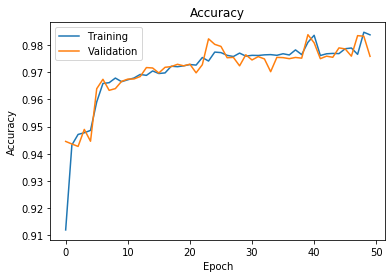

In [44]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training','Validation'], loc='upper left')

plt.show()


In [45]:
print(history)

In [47]:
# evaluate the network
print("[INFO] evaluating network...")
print(classification_report(dummy_y_Test.argmax(axis=1),
                            predictions.argmax(axis=1)))


[INFO] evaluating network...


NameError: name 'classification_report' is not defined

In [48]:
predictions=model.predict(X_test, batch_size=32)
print(predictions)

[[9.996482e-01 3.806080e-16 3.518191e-04 0.000000e+00 0.000000e+00]
 [1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
 [1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
 ...
 [1.000000e+00 0.000000e+00 6.555489e-37 0.000000e+00 0.000000e+00]
 [1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
 [1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]


In [50]:
from sklearn.metrics import classification_report
# evaluate the network
print("[INFO] evaluating network...")
print(classification_report(dummy_y_Test.argmax(axis=1),
                            predictions.argmax(axis=1)))


[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.65      0.97      0.78      4329
           1       0.94      0.74      0.83      3332
           2       0.83      0.72      0.77      1053
           3       0.00      0.00      0.00        87
           4       0.00      0.00      0.00      1199

    accuracy                           0.74     10000
   macro avg       0.48      0.49      0.48     10000
weighted avg       0.68      0.74      0.69     10000



C:\Users\Lana\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [232]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(dummy_y_Test.argmax(axis=1), predictions.argmax(axis=1))
print(confusion_matrix)

[[4138   49  142    0    0]
 [1027 2144  161    0    0]
 [  34  113  906    0    0]
 [  40    0   47    0    0]
 [1083    0  116    0    0]]


In [225]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics


# precision_recall_fscore_support(features_subset2, labels_subset2, average='macro')
# print(metrics.confusion_matrix(Y_test, predictions))
print(metrics.accuracy_score(dummy_y_Test, predictions))
print(metrics.precision_score(dummy_y_Test, predictions))
print(metrics.recall_score(dummy_y_Test, predictions))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets